# How to scrape data from FotMob?

In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
#input the url for the target game
url = "https://www.fotmob.com/match/3918144/matchfacts/villarreal-vs-barcelona"

In [ ]:
# get the html code for that url
r = requests.get(url)
html = r.text
soup = BeautifulSoup(html, "html.parser")

In [ ]:
# get the data as json
data = json.loads(soup.find("script", attrs={"id": "__NEXT_DATA__"}).text)

## You can use "https://codebeautify.org/jsonviewer " to see the json data as a tree

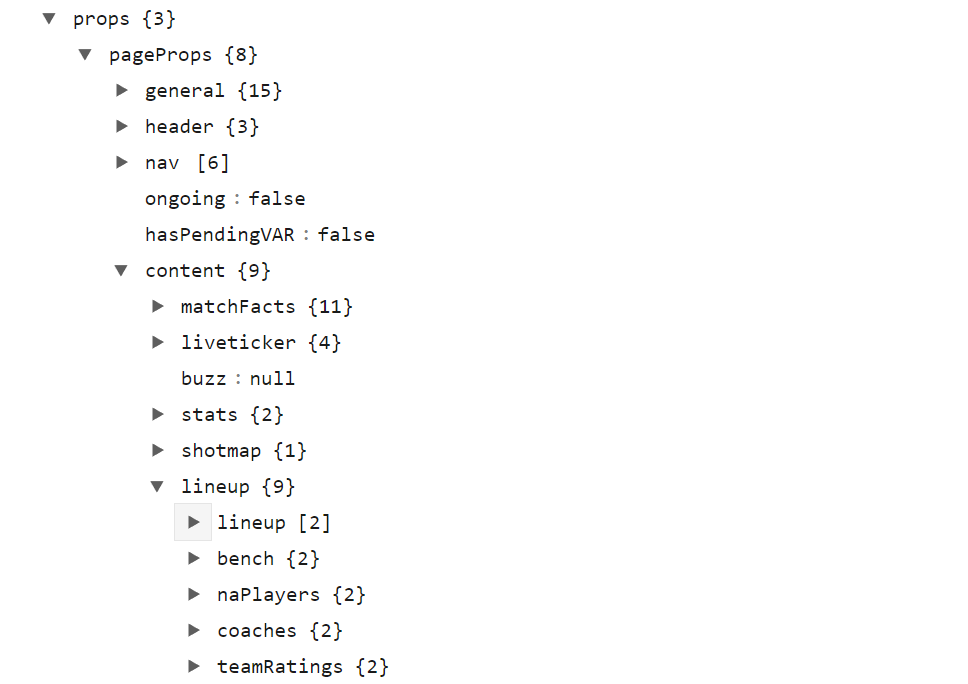

In [ ]:
# select props -> pageProps to get the useful data

useful_data = data["props"]["pageProps"]

## let's get for example stats of all the players in this game

In [ ]:
# select props -> pageProps -> content -> lineup to get the lineup

lineups = useful_data["content"]["lineup"]['lineup']

## Now let's get data of all players for both teams

In [ ]:
# let's see the dataframe for bench players for team1

lineup_team1 = lineups[0]
pd.DataFrame(lineup_team1["bench"])

,id,usingOptaId,name,imageUrl,pageUrl,shirt,isHomeTeam,timeSubbedOn,timeSubbedOff,usualPosition,...,role,isCaptain,events,rating,fantasyScore,minutesPlayed,shotmap,stats,teamData,positionStringShort
0,688300,False,"{'firstName': 'Samuel', 'lastName': 'Chukwueze'}",https://images.fotmob.com/image_resources/play...,/players/688300/samuel-chukwueze,11,True,36.0,None,2,...,Midfielder,False,{'sub': {'subbedIn': 36}},"{'num': '6.7', 'bgcolor': '#f08022', 'isTop': ...",{'bgcolor': 'purple'},54,"[{'id': 2507297755, 'eventType': 'Miss', 'team...","[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
1,1127224,False,"{'firstName': 'Fer', 'lastName': 'Nino'}",https://images.fotmob.com/image_resources/play...,/players/1127224/fer-nino,34,True,83.0,None,3,...,Attacker,False,{'sub': {'subbedIn': 83}},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},7,"[{'id': 2507298753, 'eventType': 'Miss', 'team...","[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
2,268282,False,"{'firstName': 'Manuel', 'lastName': 'Trigueros'}",https://images.fotmob.com/image_resources/play...,/players/268282/manuel-trigueros,14,True,83.0,None,2,...,Midfielder,False,{'sub': {'subbedIn': 83}},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},7,"[{'id': 2507301059, 'eventType': 'Miss', 'team...","[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
3,474673,False,"{'firstName': 'Johan', 'lastName': 'Mojica'}",https://images.fotmob.com/image_resources/play...,/players/474673/johan-mojica,12,True,83.0,None,1,...,Defender,False,{'sub': {'subbedIn': 83}},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},7,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
4,1202587,False,"{'firstName': 'Ramon', 'lastName': 'Terrats'}",https://images.fotmob.com/image_resources/play...,/players/1202587/ramon-terrats,39,True,NaN,None,2,...,Midfielder,False,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
5,210683,False,"{'firstName': 'Aissa', 'lastName': 'Mandi'}",https://images.fotmob.com/image_resources/play...,/players/210683/aissa-mandi,23,True,NaN,None,1,...,Defender,False,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
6,821728,False,"{'firstName': 'Jorge', 'lastName': 'Cuenca'}",https://images.fotmob.com/image_resources/play...,/players/821728/jorge-cuenca,5,True,NaN,None,1,...,Defender,False,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
7,175311,False,"{'firstName': '', 'lastName': 'Kiko'}",https://images.fotmob.com/image_resources/play...,/players/175311/kiko,2,True,NaN,None,1,...,Defender,False,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None
8,1101270,False,"{'firstName': 'Iker', 'lastName': 'Álvarez'}",https://images.fotmob.com/image_resources/play...,/players/1101270/iker-lvarez,31,True,NaN,None,0,...,Keeper,False,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None


In [ ]:
# Create an empty dataframe using pandas
df = pd.DataFrame([])

# Iterate through each lineup in the list of lineups
for lineup in lineups:
    # Extract the team name and bench information from the lineup
    teamname = lineup["teamName"]
    bench = pd.DataFrame(lineup["bench"])
    
    # Extract player information from the lineup
    players_list = lineup["players"]
    new_df = bench
    
    # For each player in the lineup, create a new dataframe with their information
    for players in players_list:
        df_players = pd.DataFrame(players)
        new_df = pd.concat([new_df, df_players], ignore_index=True)
    
    # Add the team name to the new dataframe
    new_df["teamName"] = teamname
    
    # Append the new dataframe to the main dataframe
    df = pd.concat([df, new_df], ignore_index=True)


In [ ]:
df

,id,usingOptaId,name,imageUrl,pageUrl,shirt,isHomeTeam,timeSubbedOn,timeSubbedOff,usualPosition,...,events,rating,fantasyScore,minutesPlayed,shotmap,stats,teamData,positionStringShort,teamName,shortName
0,688300,False,"{'firstName': 'Samuel', 'lastName': 'Chukwueze'}",https://images.fotmob.com/image_resources/play...,/players/688300/samuel-chukwueze,11,True,36.0,NaN,2,...,{'sub': {'subbedIn': 36}},"{'num': '6.7', 'bgcolor': '#f08022', 'isTop': ...",{'bgcolor': 'purple'},54,"[{'id': 2507297755, 'eventType': 'Miss', 'team...","[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
1,1127224,False,"{'firstName': 'Fer', 'lastName': 'Nino'}",https://images.fotmob.com/image_resources/play...,/players/1127224/fer-nino,34,True,83.0,NaN,3,...,{'sub': {'subbedIn': 83}},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},7,"[{'id': 2507298753, 'eventType': 'Miss', 'team...","[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
2,268282,False,"{'firstName': 'Manuel', 'lastName': 'Trigueros'}",https://images.fotmob.com/image_resources/play...,/players/268282/manuel-trigueros,14,True,83.0,NaN,2,...,{'sub': {'subbedIn': 83}},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},7,"[{'id': 2507301059, 'eventType': 'Miss', 'team...","[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
3,474673,False,"{'firstName': 'Johan', 'lastName': 'Mojica'}",https://images.fotmob.com/image_resources/play...,/players/474673/johan-mojica,12,True,83.0,NaN,1,...,{'sub': {'subbedIn': 83}},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},7,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
4,1202587,False,"{'firstName': 'Ramon', 'lastName': 'Terrats'}",https://images.fotmob.com/image_resources/play...,/players/1202587/ramon-terrats,39,True,NaN,NaN,2,...,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
5,210683,False,"{'firstName': 'Aissa', 'lastName': 'Mandi'}",https://images.fotmob.com/image_resources/play...,/players/210683/aissa-mandi,23,True,NaN,NaN,1,...,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
6,821728,False,"{'firstName': 'Jorge', 'lastName': 'Cuenca'}",https://images.fotmob.com/image_resources/play...,/players/821728/jorge-cuenca,5,True,NaN,NaN,1,...,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
7,175311,False,"{'firstName': '', 'lastName': 'Kiko'}",https://images.fotmob.com/image_resources/play...,/players/175311/kiko,2,True,NaN,NaN,1,...,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
8,1101270,False,"{'firstName': 'Iker', 'lastName': 'Álvarez'}",https://images.fotmob.com/image_resources/play...,/players/1101270/iker-lvarez,31,True,NaN,NaN,0,...,{},"{'num': None, 'bgcolor': '#989898', 'isTop': {...",{'bgcolor': 'purple'},0,[],"[{'title': 'Top stats', 'stats': {'FotMob rati...","{'home': {'id': 10205, 'color': '#153662'}, 'a...",None,Villarreal,NaN
9,30660,False,"{'firstName': 'Pepe', 'lastName': 'Reina'}",https://images.fotmob.com/image_resources/play...,/players/30660/pepe-reina,1,True,None,NaN,0,...,{},"{'num': '7.0', 'bgcolor': '#1ec853', 'isTop': ...",{'bgcolor': 'purple'},90

# Save the dataset as csv

In [ ]:
df.to_csv("players_stats_villareal_vs_fcbarcelona.csv")